## Import modules

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os 

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## Import data

In [2]:
#During data wrangling of Instacart data, I merge all data files into one dataframe called 'data'.
#import data path 

data = pd.read_csv('../../data/instacart_data.csv')

In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int64  
 6   department_id           1384617 non-null  int64  
 7   user_id                 1384617 non-null  int64  
 8   eval_set                1384617 non-null  object 
 9   order_number            1384617 non-null  int64  
 10  order_dow               1384617 non-null  int64  
 11  order_hour_of_day       1384617 non-null  int64  
 12  days_since_prior_order  1384617 non-null  float64
 13  aisle                   1384617 non-null  object 
 14  de

(1384617, 15)

I noticed that after merging datasets, my dataset is short 265,085 rows. The order_products_prior dataset had 32,434,489; the current dataset has 29,783,636 This probably happened during the merging process. Also, the 'id' objects I created in the data wrangling file were converted back to int64 format. 

In [29]:
#data['order_id'] = data.order_id.astype(object)
#data['product_id'] = data.product_id.astype(object)
#data['department_id'] = data.department_id.astype(object)
#data['user_id'] = data.user_id.astype(object)
#data['aisle_id'] = data.aisle_id.astype(object)

#data.info()

In [30]:
data.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,4,10,9.0,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,47901,train,14,4,6,16.0,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,2993,train,15,0,7,7.0,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,41425,train,4,3,8,14.0,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,187205,train,5,4,14,30.0,yogurt,dairy eggs


In [31]:
data.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01,7.130423e+01,9.839777e+00,1.031128e+05,1.709141e+01,2.701392e+00,1.357759e+01,1.706613e+01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01,3.810409e+01,6.292830e+00,5.948715e+04,1.661404e+01,2.167646e+00,4.238458e+00,1.042642e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.173200e+04,6.000000e+00,1.000000e+00,1.000000e+01,7.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00,8.300000e+01,8.000000e+00,1.029330e+05,1.100000e+01,3.000000e+00,1.400000e+01,1.500000e+01
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.549590e+05,2.100000e+01,5.000000e+00,1.700000e+01,3.000000e+01
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


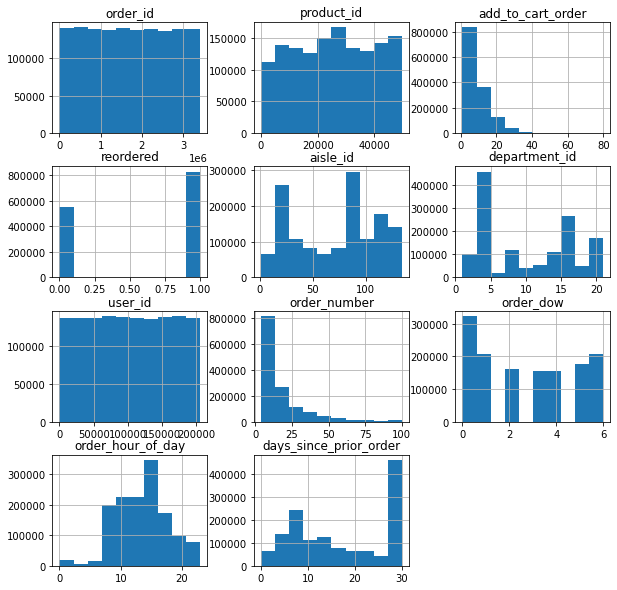

In [32]:
hist = data.hist(bins=10,  figsize=(10,10))

- `add_to_cart_order`: most shoppers add between 1 and ~17 items to their orders. 
- `reordered`: after the first order, shoppers are more likely to reorder previous items than not. 
- `order_number`: after about 10 orders, additional orders made decreases over 50 percent. After an additional 10 orders (20 total) order appear to decrease by another 50 percent. 
-`order_dow`: 0 & 1 are the most popular days orders are placed, suggesting they might be weekend days. 
-`order_hour_of_day`: 3-5PM (15-17hrs) is the most popular time of the day for orders to be placed. 
-`days_since_prior_order`: orders peak around 7 days, suggesting shoppers order on a weekly basis. 
- `product_id`: there are peaks in product id which could be from a frequently order/reordered product across users. 
- `department_id`: there are aisles/products in between department 3-5 that are highly popular.  

In [7]:
data.nunique(axis=0)

order_id                  131209
product_id                 39123
add_to_cart_order             80
reordered                      2
product_name               39123
aisle_id                     134
department_id                 21
user_id                   131209
eval_set                       1
order_number                  97
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
aisle                        134
department                    21
dtype: int64

In [27]:
#sns.pairplot(data)

#Not a useful viz for the size of this dataset.

<AxesSubplot:>

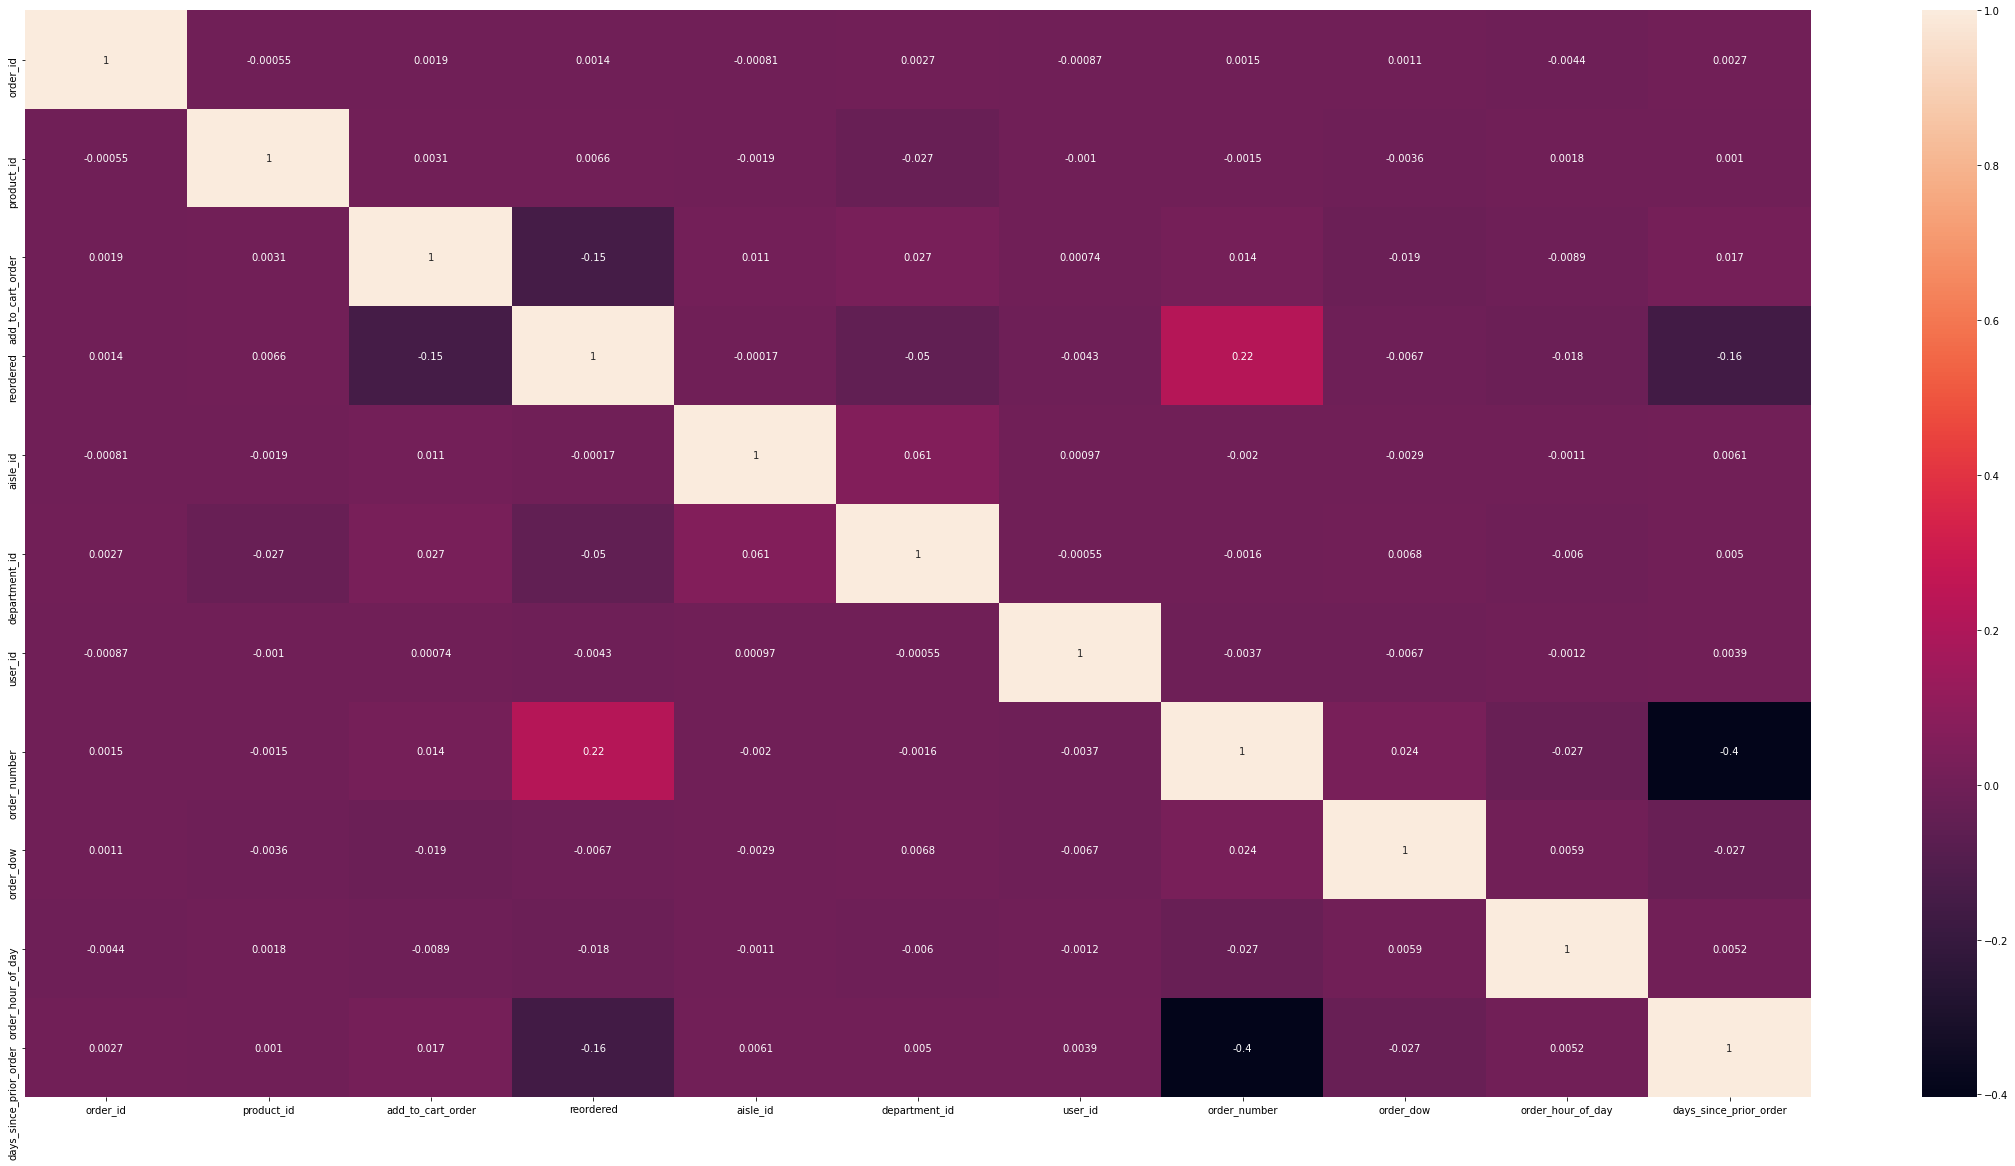

In [9]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), annot=True)

I am surprised that there seems to be very little correlations between Instacart features. I will continue to develop data profiles/summary tables for each coefficent to bette understand each attribute.  

In [36]:
total_orders = data.groupby(['user_id']).agg('order_number').sum()

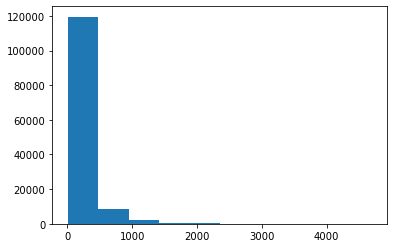

In [37]:
_ = plt.hist(total_orders, bins=10)

In [10]:
#_ = sns.swarmplot(x='department_id', y='order_number', data=data)
#_ = plt.xlabel("Department")
#_ = plt.ylabel("# of orders per departments")
#plt.show()

#swarmplots are ideal for smaller datasets

EDA for categorical features: 
- aisle_id 
- department_id 
- products_id
- order_id 
- aisle 
- department 
- product_name

<AxesSubplot:>

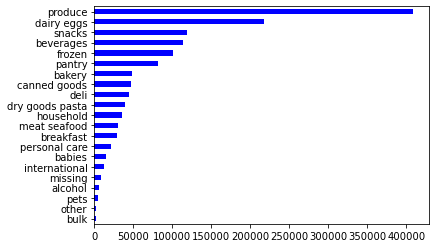

In [22]:
#How many products are in each department? 
data['department'].value_counts().sort_values(ascending=True).plot(kind='barh', color='blue')

In [23]:
#which aisles have the most products? 
total_products = data['product_name'].groupby('aisle')[['product_id']].count()
total_products.head()

KeyError: 'aisle'

#Questions to answer
- How many users are there? 
- How many orders were placed by every user? 
- How many orders with no reordered products? 
- What are the most frequently ordered/reordered products? 
- How frequently are products ordered and reordered from each aisle? 
- How frequently are products ordered and reordered from each department? 
- What are the cart size on different orders? 
- How many products were ordered and reordered on a particular day of the week? 
- How many products were ordered and reordered on a particular hour of the day? 
- Which products are frequently bought by weekly buyers and monthly buyers? 
- Are there any users whose orders contains only reordered products? 